 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [23]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [24]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")



In [25]:
# Count nulls
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index(inplace=True)



In [26]:
# Drop nulls
whale_returns_df.isnull().sum()
whale_returns_df.dropna(inplace=True)
whale_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [27]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")


In [28]:
# Count nulls
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_index(inplace=True)


In [29]:
# Drop nulls
algo_returns_df.isnull().sum()
algo_returns_df.dropna(inplace=True)
algo_returns_df.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [30]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")


In [31]:
# Check Data Types
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [32]:
# Fix Data Types
sp500_history_df.dtypes
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df.dtypes




C:\Users\jackie\AppData\Local\Temp\ipykernel_20812\1757059891.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')


Close    float64
dtype: object

In [33]:
# Calculate Daily Returns
sp500_history_df = sp500_history_df.pct_change()
sp500_history_df.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [34]:
# Drop nulls
sp500_history_df.isnull().sum()
sp500_history_df.dropna(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [35]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df.rename(columns={'Close':'SP500'}, inplace=True)
sp500_history_df.head()


,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [36]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis='columns', join='inner')
combined_df.sort_index(inplace=True)
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns of All Portfolios'}, xlabel='Date'>

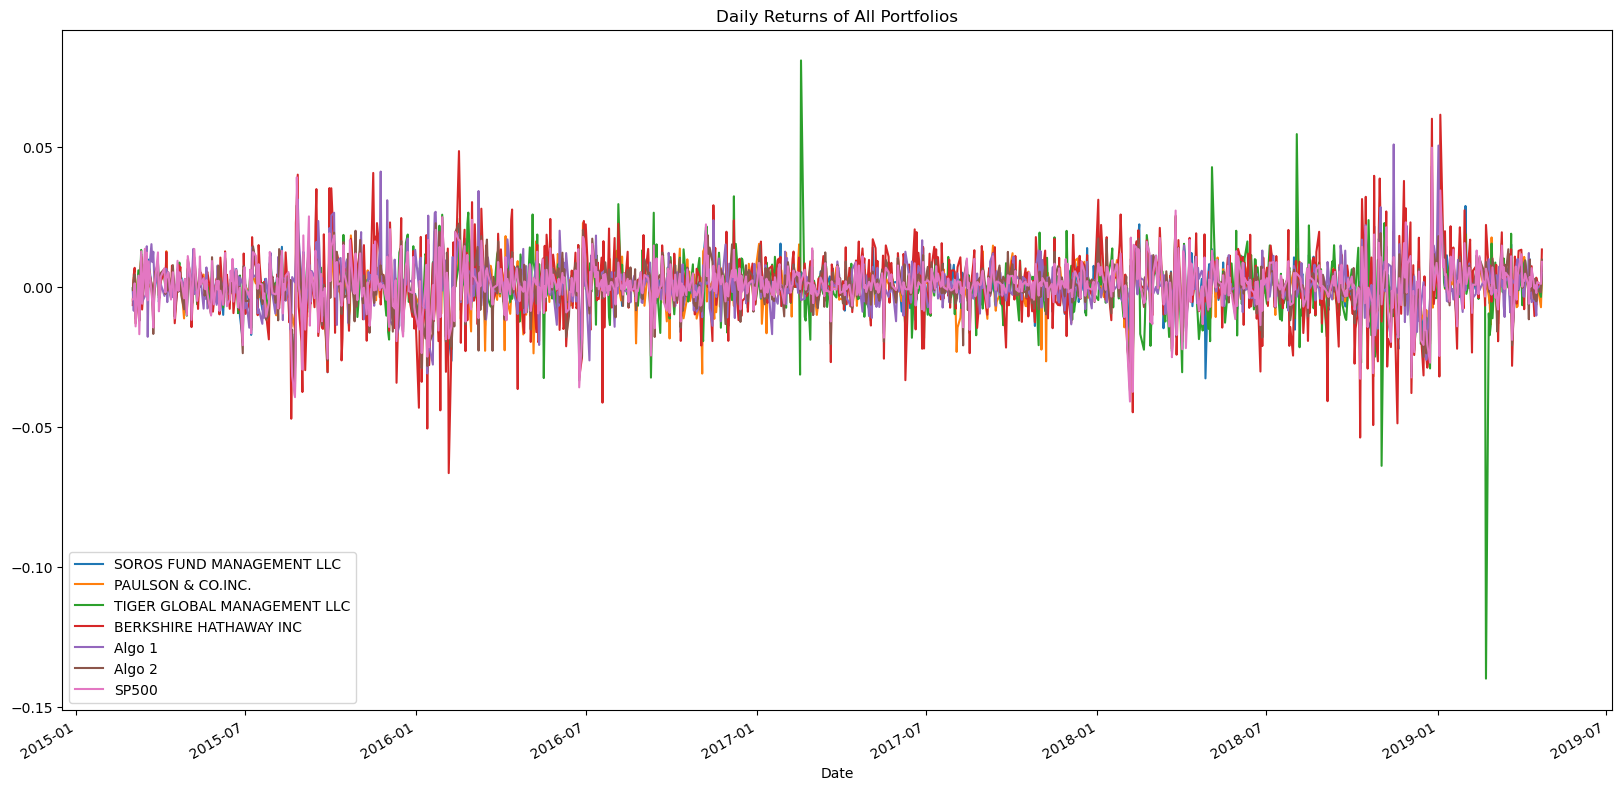

In [37]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title='Daily Returns of All Portfolios')



#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns of All Portfolios'}, xlabel='Date'>

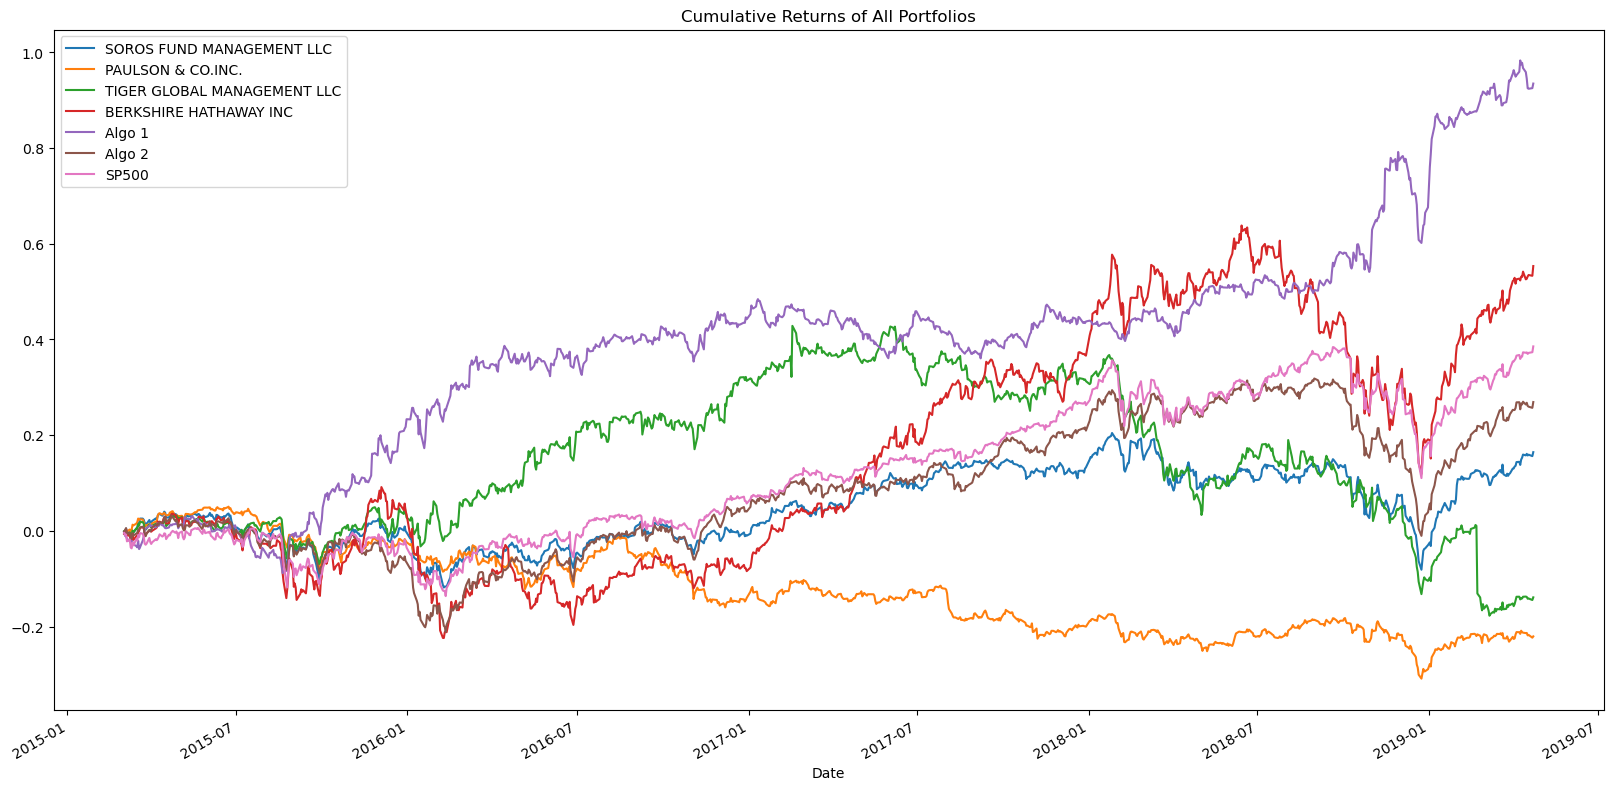

In [38]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns of All Portfolios')



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'Risk of All Portfolios'}>

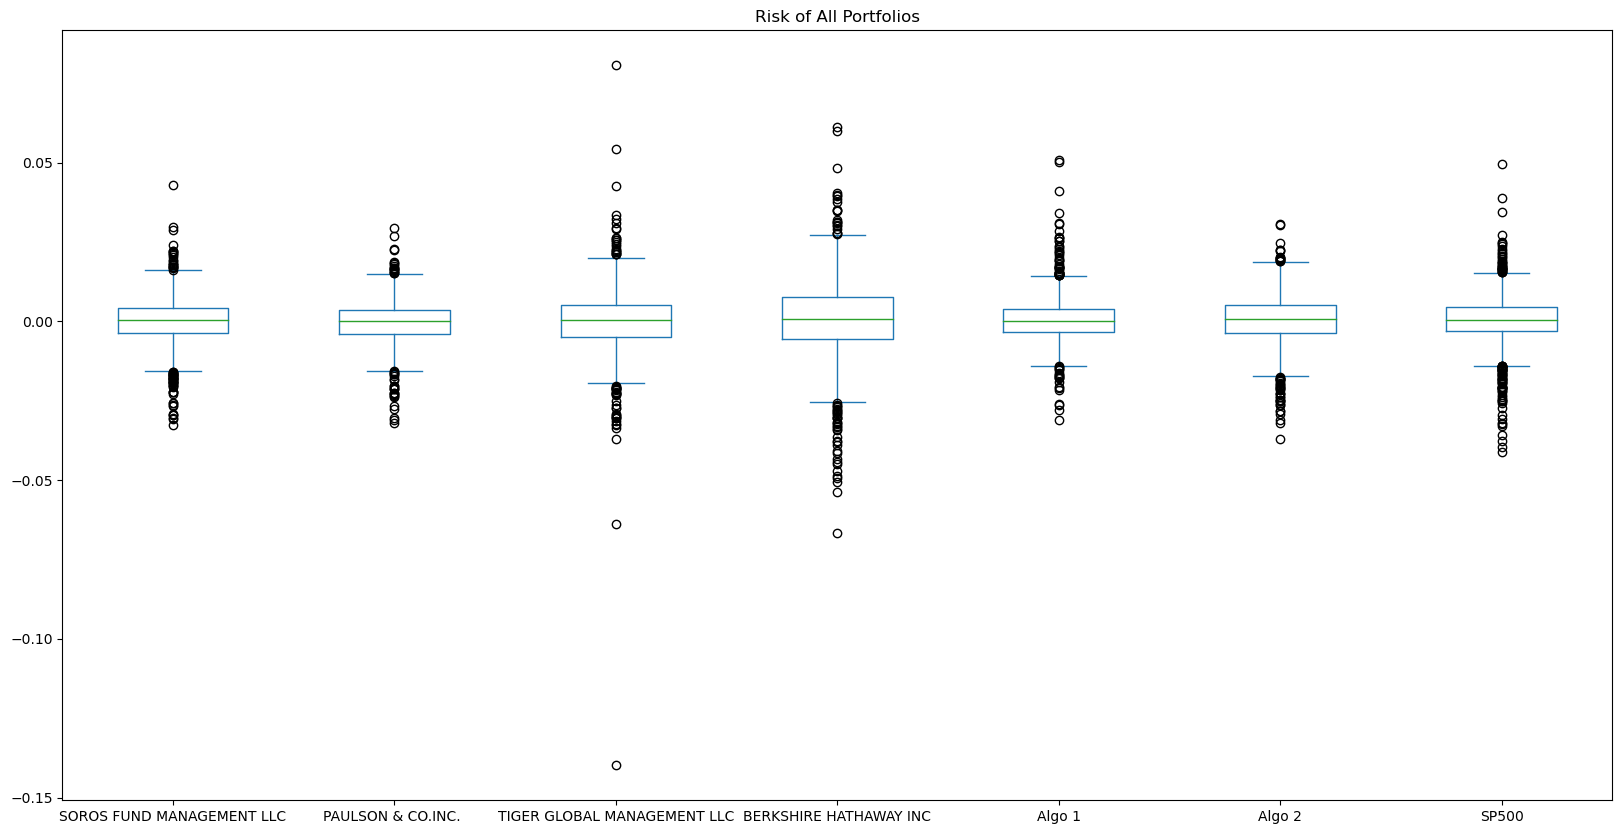

In [39]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10), title='Risk of All Portfolios')



### Calculate Standard Deviations

In [40]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std.head()


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [41]:
# Calculate the daily standard deviation of S&P 500
sp500_std = sp500_history_df['SP500'].std()
print(sp500_std)

# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = daily_std > sp500_std
print(riskier_portfolios)






0.008111270297036554
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                          True
SP500                           True
dtype: bool


### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()


SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling Standard Deviation of All Portfolios'}, xlabel='Date'>

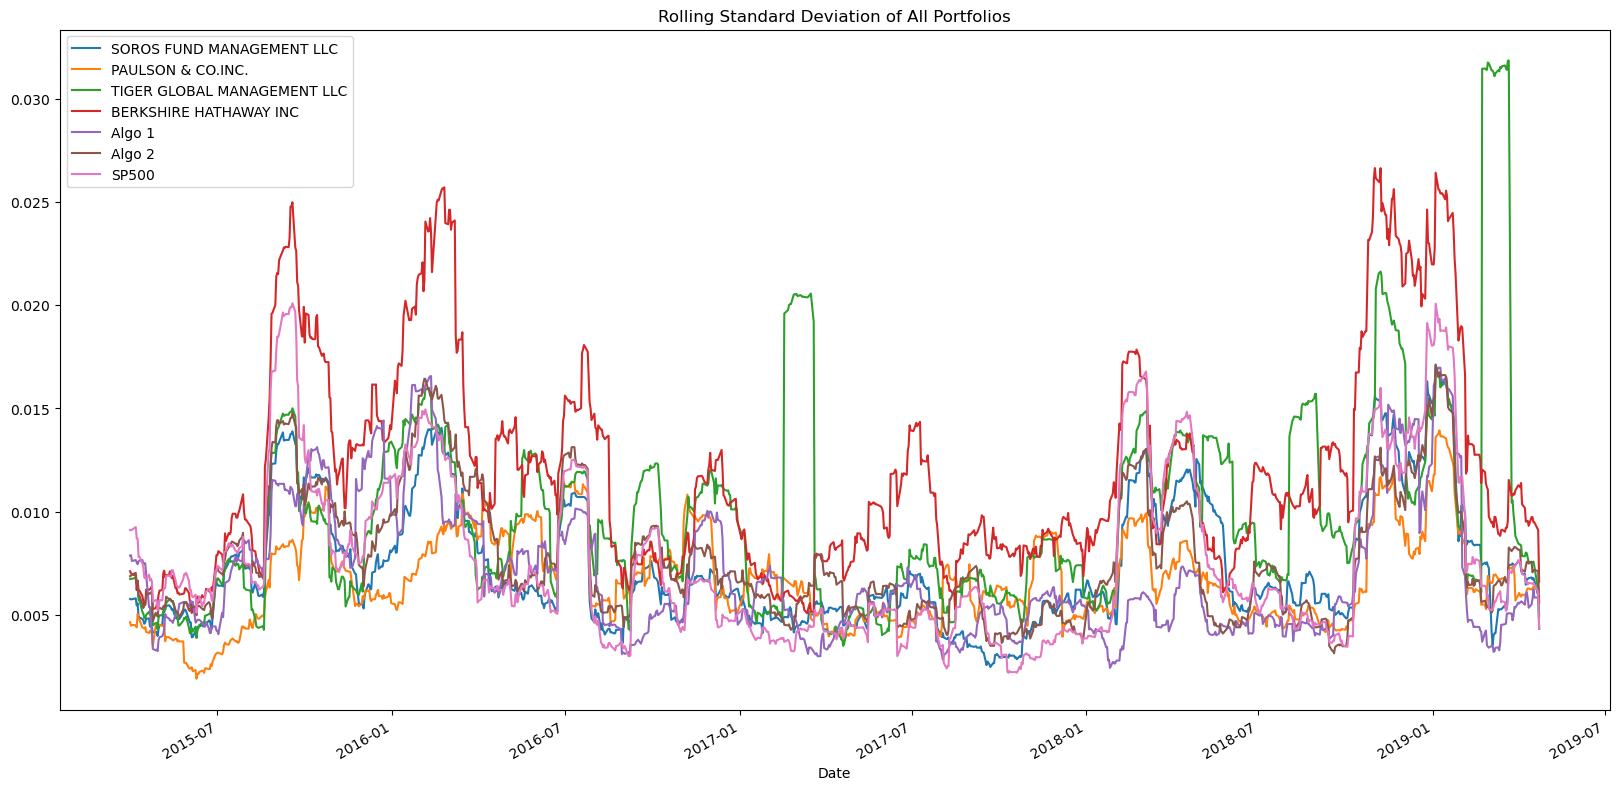

In [43]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()
rolling_std.head()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10), title='Rolling Standard Deviation of All Portfolios')



### Calculate and plot the correlation

<Axes: >

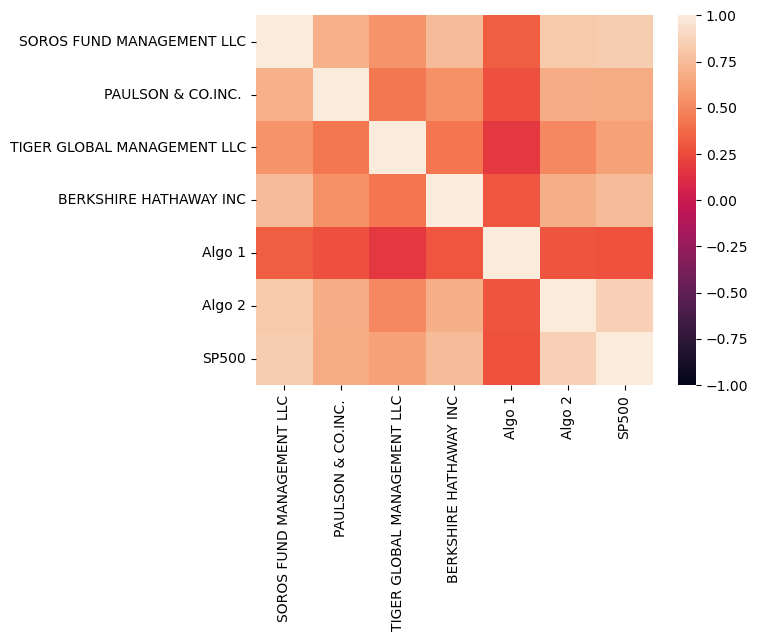

In [44]:
# Calculate the correlation
correlation = combined_df.corr()
correlation.head()

# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Rolling 30-Day Beta of Berkshire Hathaway'}, xlabel='Date'>

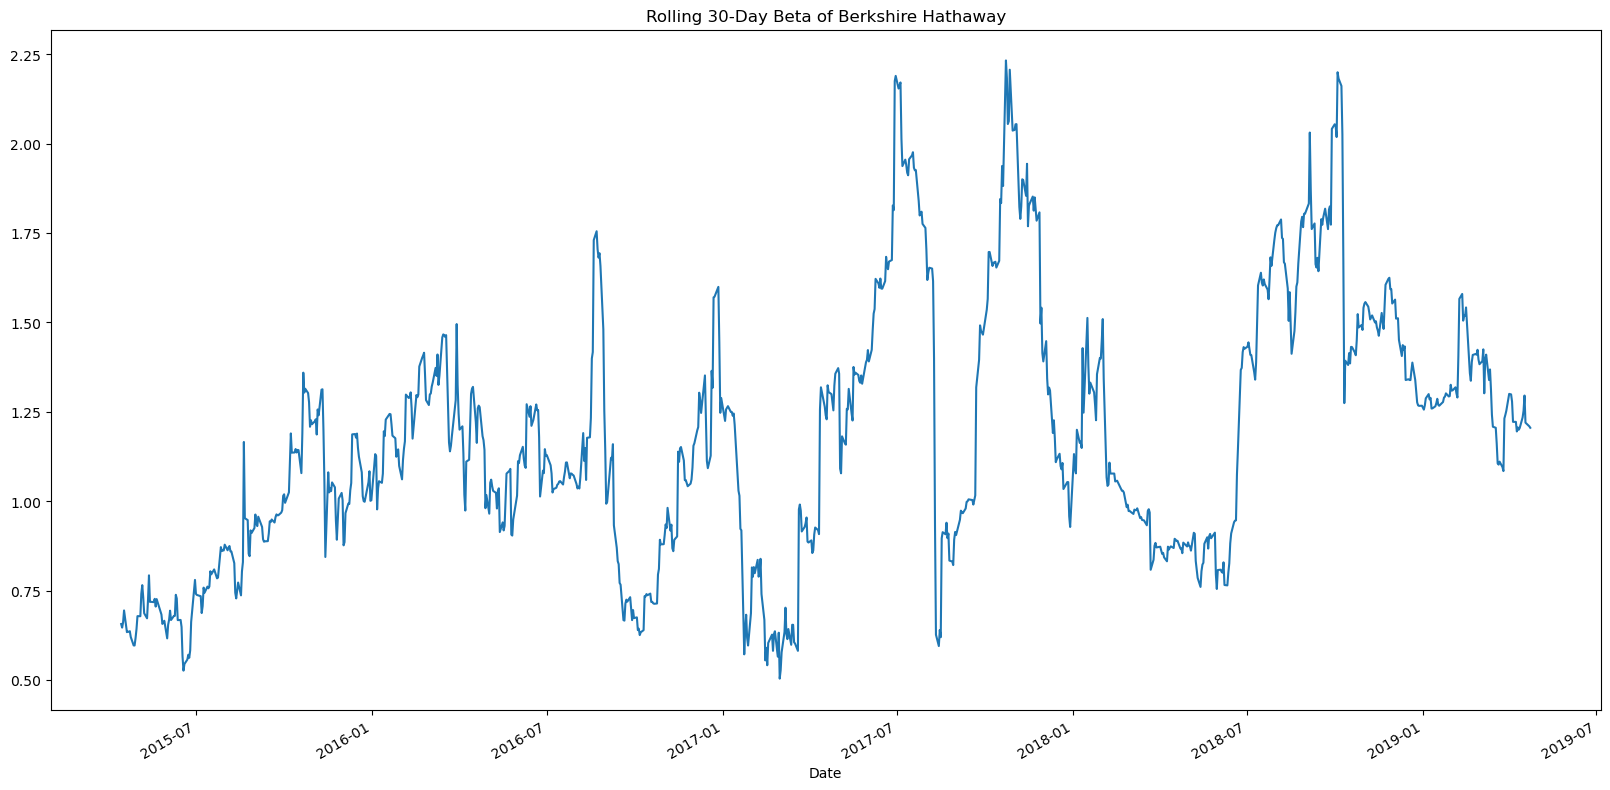

In [45]:
# Calculate covariance of a single portfolio
variance = combined_df['BERKSHIRE HATHAWAY INC'].var()
variance


# Calculate variance of S&P 500
sp500_variance = sp500_history_df['SP500'].var()
sp500_variance


# Computing beta
covariance = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['SP500'])
covariance


# Plot beta trend
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(combined_df['SP500'])
rolling_variance = combined_df['SP500'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Berkshire Hathaway')





## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [46]:
# Use `ewm` to calculate the rolling window
ewm = combined_df.ewm(halflife=21, adjust=True).mean()
ewm.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.004462
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.002514
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005575
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.003543


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.head()



SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

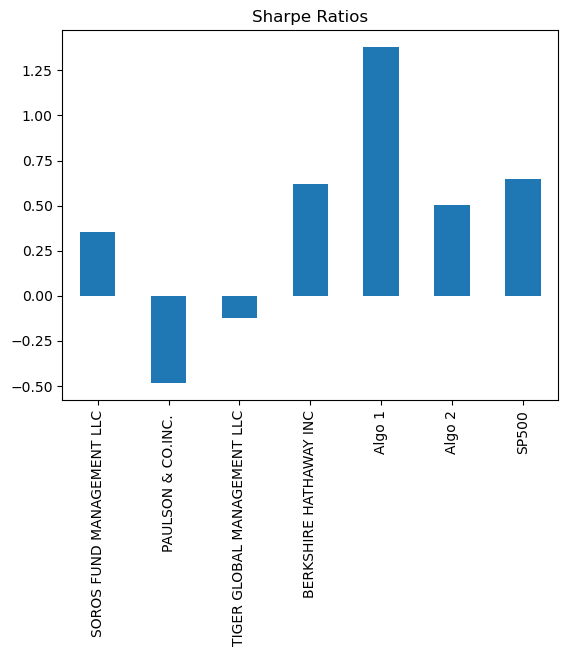

In [48]:
# Visualize the sharpe ratios as a bar plot]
sharpe_ratios.plot.bar(title='Sharpe Ratios')



### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
Algo 1 and S&P 500 outperform the whales portfolios. Algo 2 does not outperform the whales portfolios.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [49]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [50]:
# Reading data from 1st stock
amd_df = Path("Resources/AMD.csv")
amd_df = pd.read_csv(amd_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
amd_df.__str__()
str(amd_df)




'                      Close\nDate                       \n2023-01-03 16:00:00   64.02\n2023-01-04 16:00:00   64.66\n2023-01-05 16:00:00   62.33\n2023-01-06 16:00:00   63.96\n2023-01-09 16:00:00   67.24\n...                     ...\n2023-09-08 16:00:00  106.09\n2023-09-11 16:00:00  105.32\n2023-09-12 16:00:00  105.31\n2023-09-13 16:00:00  107.71\n2023-09-14 16:00:00  106.63\n\n[176 rows x 1 columns]'

In [51]:
# Reading data from 2nd stock
intc_df = Path("Resources/INTC.csv")
intc_df = pd.read_csv(intc_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
intc_df.__str__()
str(intc_df)


'                     Close\nDate                      \n2023-01-03 16:00:00  26.73\n2023-01-04 16:00:00  27.68\n2023-01-05 16:00:00  27.56\n2023-01-06 16:00:00  28.73\n2023-01-09 16:00:00  29.31\n...                    ...\n2023-09-08 16:00:00  38.01\n2023-09-11 16:00:00  38.59\n2023-09-12 16:00:00  38.86\n2023-09-13 16:00:00  38.71\n2023-09-14 16:00:00  38.67\n\n[176 rows x 1 columns]'

In [52]:
# Reading data from 3rd stock
nvda_df = Path("Resources/NVDA.csv")
nvda_df = pd.read_csv(nvda_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
nvda_df.__str__()
str(nvda_df)


'                      Close\nDate                       \n2023-01-03 16:00:00  143.15\n2023-01-04 16:00:00  147.49\n2023-01-05 16:00:00  142.65\n2023-01-06 16:00:00  148.59\n2023-01-09 16:00:00  156.28\n...                     ...\n2023-09-08 16:00:00  455.72\n2023-09-11 16:00:00  451.78\n2023-09-12 16:00:00  448.70\n2023-09-13 16:00:00  454.85\n2023-09-14 16:00:00  455.81\n\n[176 rows x 1 columns]'

In [53]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([amd_df, intc_df, nvda_df], axis='columns', join='inner')
combined_df.sort_index(inplace=True)
combined_df.columns = ['AMD', 'INTC', 'NVDA']


In [54]:
# Reset Date index
combined_df.reset_index(inplace=True)
combined_df.head()


,Date,AMD,INTC,NVDA
0,2023-01-03 16:00:00,64.02,26.73,143.15
1,2023-01-04 16:00:00,64.66,27.68,147.49
2,2023-01-05 16:00:00,62.33,27.56,142.65
3,2023-01-06 16:00:00,63.96,28.73,148.59
4,2023-01-09 16:00:00,67.24,29.31,156.28


In [55]:
# Reorganize portfolio data by having a column per symbol
combined_df.drop(columns=['Date'], inplace=True)
combined_df.head()


,AMD,INTC,NVDA
0,64.02,26.73,143.15
1,64.66,27.68,147.49
2,62.33,27.56,142.65
3,63.96,28.73,148.59
4,67.24,29.31,156.28


In [56]:
# Calculate daily returns
daily_returns = combined_df.pct_change()


# Drop NAs
daily_returns.dropna(inplace=True)


# Display sample data
daily_returns.head()


,AMD,INTC,NVDA
1,0.009997,0.035541,0.030318
2,-0.036035,-0.004335,-0.032816
3,0.026151,0.042453,0.041640
4,0.051282,0.020188,0.051753
5,0.012046,0.004435,0.017981


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [57]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()


1    0.025285
2   -0.024395
3    0.036748
4    0.041074
5    0.011487
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [58]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = pd.concat([combined_df, portfolio_returns], axis='columns', join='inner')
combined_df.head()


,AMD,INTC,NVDA,0
1,64.66,27.68,147.49,0.025285
2,62.33,27.56,142.65,-0.024395
3,63.96,28.73,148.59,0.036748
4,67.24,29.31,156.28,0.041074
5,68.05,29.44,159.09,0.011487


In [59]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.dropna(inplace=True)
combined_df.head()


,AMD,INTC,NVDA,0
1,64.66,27.68,147.49,0.025285
2,62.33,27.56,142.65,-0.024395
3,63.96,28.73,148.59,0.036748
4,67.24,29.31,156.28,0.041074
5,68.05,29.44,159.09,0.011487


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [60]:
# Calculate the annualized `std`
std = combined_df.std() * np.sqrt(252)
std.head()


AMD      255.581900
INTC      49.808771
NVDA    1655.034503
0          0.374221
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling 21-Day Standard Deviation'}>

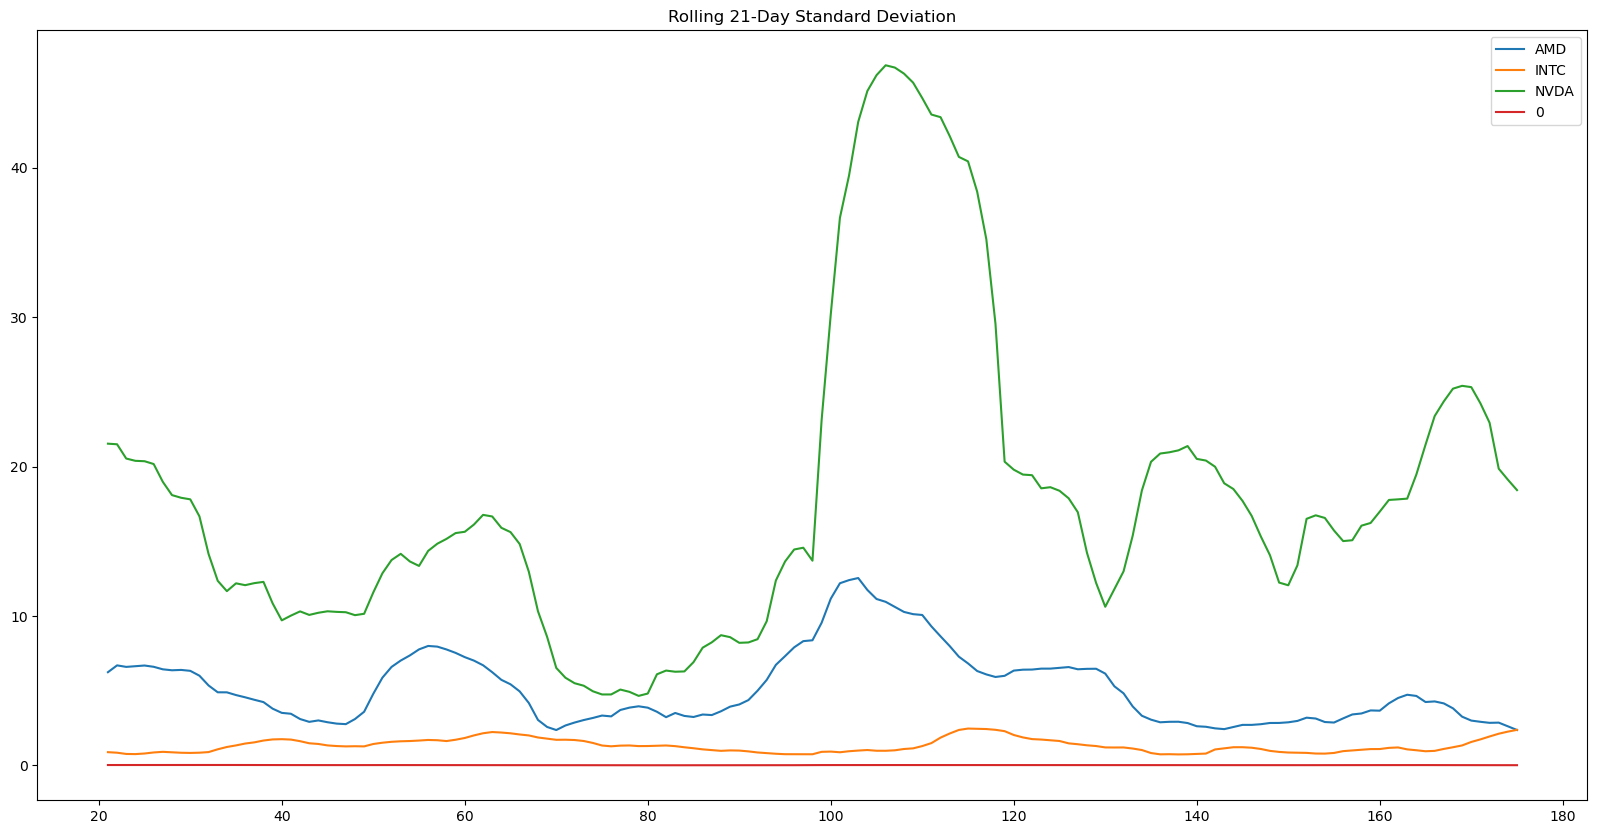

In [61]:
# Calculate rolling standard deviation
rolling_std = combined_df.rolling(window=21).std()
rolling_std.head()

# Plot rolling standard deviation
rolling_std.plot(figsize=(20,10), title='Rolling 21-Day Standard Deviation')



### Calculate and plot the correlation

In [62]:
# Calculate and plot the correlation
correlation = combined_df.corr()
correlation.head()


,AMD,INTC,NVDA,0
AMD,1.000000,0.670007,0.885171,0.038406
INTC,0.670007,1.000000,0.811333,-0.042798
NVDA,0.885171,0.811333,1.000000,-0.052797
0,0.038406,-0.042798,-0.052797,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [63]:
# Calculate and plot Beta
covariance = combined_df['AMD'].cov(combined_df['NVDA'])
variance = combined_df['NVDA'].var()
beta = covariance / variance
beta


0.13669423132585812

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [64]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.head()


AMD      96.757218
INTC    158.475029
NVDA     49.933582
0         2.912183
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

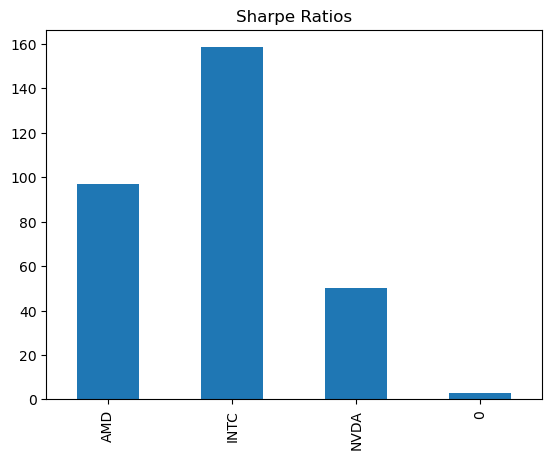

In [65]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')



### How does your portfolio do?


My portfolio does well compared to the S&P 500. It has a higher cumulative return and a higher sharpe ratio. It also has a lower standard deviation and a lower beta. It is less risky than the S&P 500 and has a higher return.